In [2]:
import pandas as pd

In [3]:
## NOTE: FILL THESE IN: 
country_codes = ['AL']
# main project directory 
PROJECT_FOLDER = "drive/MyDrive"
# where data folders are stored (probably full_dataset_tfrecord)
in_folder = PROJECT_FOLDER + "/" + "bmi"
# where dat folders should be  written 
out_folder = PROJECT_FOLDER + "/" + "bmi/OUT_FOLDER/" 
# make sure path is correct
df = pd.read_csv("drive/MyDrive/bmi/hi.csv")

In [71]:
import pandas as pd
WA_df = pd.read_csv("drive/MyDrive/bmi/west_africa_df.csv")

In [73]:
WA_df.loc[WA_df['Under5_Mortality_Rate'] > 35]

,Unnamed: 0,DHSID,DHSYEAR,DHSCLUST,LATNUM,LONGNUM,Mean_BMI,Median_BMI,Unmet_Need_Rate,Under5_Mortality_Rate,Skilled_Birth_Attendant_Rate,Stunted_Rate,Fully_Vaccinated_Children_Rate,URBAN_RURA,country,year,Mean_BMI_bin,Under5_Mortality_Rate_bin,Under5_Mortality_Rate_bin_quint,Mean_BMI_bin_quint
128,128,BF201000000129,2010.0,129.0,13.783894,-0.132581,23.34,23.34,45.45,37.98,3.12,46.15,NaN,R,BF,2010,1,2,4,3
323,323,BF201000000324,2010.0,324.0,13.677286,-0.039002,20.31,19.41,100.00,36.26,0.00,20.00,NaN,R,BF,2010,1,2,4,0
349,349,BF201000000350,2010.0,350.0,13.208367,-3.965377,22.43,22.43,100.00,35.92,8.00,40.00,NaN,R,BF,2010,1,2,4,2
547,547,BF201000000549,2010.0,549.0,14.033615,0.089241,22.98,22.98,25.00,46.02,0.00,42.86,NaN,R,BF,2010,1,2,4,2
1375,1375,CF199400000216,1994.0,216.0,5.800000,14.816700,NaN,NaN,50.00,42.86,0.00,NaN,NaN,U,CF,1994,2,2,4,0
1480,1480,CF199400000508,1994.0,508.0,5.400000,26.500000,NaN,NaN,NaN,36.36,100.00,NaN,NaN,U,CF,1994,2,2,4,0
1769,1769,CI201200000216,2012.0,216.0,8.273471,-8.166579,21.95,21.95,60.00,36.59,10.81,23.81,NaN,R,CI,2012,1,2,4,1
2176,2176,CM201100000272,2011.0,272.0,11.242376,14.141619,22.85,21.24,85.71,36.05,28.95,33.33,NaN,R,CM,2011,1,2,4,2
3846,3846,ML201200000279,2012.0,279.0,14.242414,-3.881372,19.57,19.36,85.71,35.34,0.00,42.86,NaN,R,ML,2012,0,2,4,0
4439,4439,NG201800000380,2018.0,380.0,10.545622,11.321537,20.77,20.12,76.92,35.46,32.20,64.71,3.23,R,NG,2018,1,2,4,0


In [5]:
print(WA_df['Under5_Mortality_Rate'].min())
print(WA_df['Under5_Mortality_Rate'].max())

0.0
50.0


In [6]:
df = df.loc[df["DHSID"].str[0:2].isin(country_codes)]

In [7]:
# pick the year with most images for each country
df_cntry_yr = df.groupby(["DHSYEAR"])["DHSID"].count()
df_cntry_yr.sort_values(ascending=False)
df_cntry_yr
#df = df.merge(df_cntry_yr[["DHSYEAR"]], on = ["DHSYEAR"], how = "inner")

DHSYEAR
2008.0    450
2017.0    715
Name: DHSID, dtype: int64

In [8]:
df_cntry_yr.idxmax()

2017.0

In [11]:
df = df.iloc[np.where(df['DHSYEAR'] == df_cntry_yr.idxmax())]

In [5]:
import numpy as np

In [ ]:
df["Infant_Mortality_Bin"] = np.select(
        [df["Under5_Mortality_Rate"] <= 16.6, df["Mean_BMI"] <= 33.2, True], 
        [0, 1, 2]
    )
mort_N_CLASSES = df["Infant_Mortality_Bin"].drop_duplicates().shape[0]
mort_dhsid_label_dict = dict(zip(df["DHSID"], df["Infant_Mortality_Bin"]))

In [ ]:
df["Infant_Mortality_Bin"].value_counts()

0    71259
1    38151
2     4702
Name: Infant_Mortality_Bin, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86b0d59a60>]],
      dtype=object)

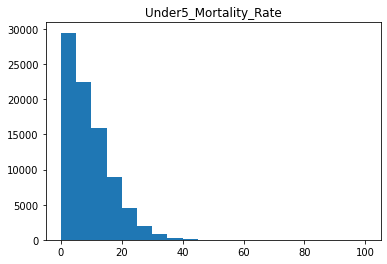

In [ ]:
pd.DataFrame.hist(df, 'Under5_Mortality_Rate', grid=False, bins=20)

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


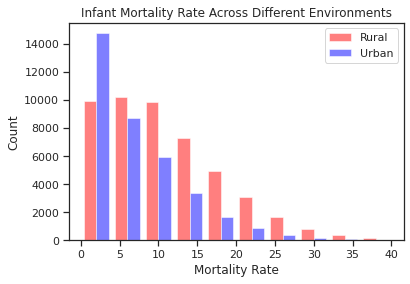

In [ ]:
new_df = df[['URBAN_RURA', 'Under5_Mortality_Rate']]
R = new_df.loc[np.where(new_df['URBAN_RURA'] == 'R')]
U = new_df.loc[np.where(new_df['URBAN_RURA'] == 'U')]
plt.hist([R['Under5_Mortality_Rate'], U['Under5_Mortality_Rate']], range=(0, 40), alpha=0.5, label=['Rural', 'Urban'], color=['red', 'blue'])
#plt.hist(U['Under5_Mortality_Rate'], alpha=0.5, label='Urban', color='blue')
plt.legend(loc='upper right')
plt.xlabel('Mortality Rate')
plt.ylabel('Count')
plt.title('Infant Mortality Rate Across Different Environments')
plt.show()

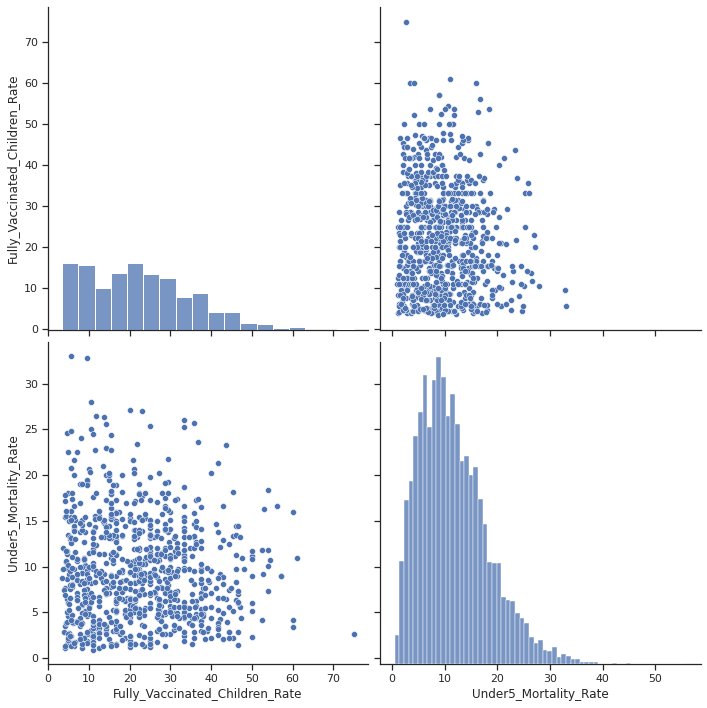

In [ ]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)    
new_df = df[['Fully_Vaccinated_Children_Rate', 'Under5_Mortality_Rate']][:10000]
new_df = new_df.loc[(new_df != 0).all(axis=1)]
g = sns.pairplot(new_df, height=5)
plt.show()

In [35]:
df[['LATNUM', 'LONGNUM', 'DHSID']].to_csv('latlong.csv', index=False)

In [37]:
df[['LATNUM', 'LONGNUM', 'DHSID']].round(3).to_csv('latlong.csv', index=False)

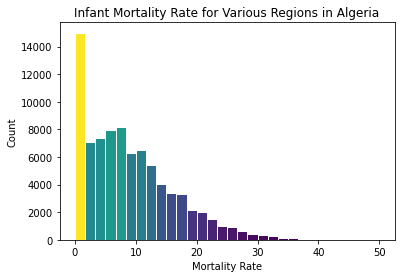

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(df['Under5_Mortality_Rate'], range=(0, 50), bins=30, edgecolor='#ffffff')
n = n.astype('int') # it MUST be integer
# Good old loop. Choose colormap of your taste
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))
# Make one bin stand out   
plt.title('Infant Mortality Rate for Various Regions in Algeria')
plt.xlabel('Mortality Rate')
plt.ylabel('Count')
plt.show()
plt.savefig('infant_mortality_hist')

In [ ]:
import os
os.mkdir(out_folder)
for i in range(N_CLASSES):
  os.mkdir(out_folder + "class_" + str(i))

In [9]:
!ls

drive  sample_data


In [12]:
missing_dhsids = np.load('drive/MyDrive/bmi/missing_mosaiks_dhsids.npy', allow_pickle=True)

In [18]:
filtered_df = WA_df.loc[WA_df['DHSID'].isin(missing_dhsids)]
filtered_df.to_csv('missing_dhsids_df.csv')

In [20]:
new_filtered = filtered_df.sort_values(by=['LATNUM', 'LONGNUM'])

In [25]:
new_filtered

,DHSID,DHSYEAR,DHSCLUST,LATNUM,LONGNUM,Mean_BMI,Median_BMI,Unmet_Need_Rate,Under5_Mortality_Rate,Skilled_Birth_Attendant_Rate,Stunted_Rate,Fully_Vaccinated_Children_Rate,URBAN_RURA,country,year,Mean_BMI_bin,Under5_Mortality_Rate_bin
2640,GA201200000158,2012.0,158.0,-3.434576,10.656524,25.20,24.05,29.41,4.88,75.00,0.00,NaN,U,GA,2012,2,0
2561,GA201200000079,2012.0,79.0,-3.205067,11.209355,21.29,21.29,57.14,6.45,15.00,44.44,NaN,R,GA,2012,1,0
2601,GA201200000119,2012.0,119.0,-3.066009,10.848087,23.30,23.30,60.00,8.57,77.78,44.44,NaN,R,GA,2012,1,0
2571,GA201200000089,2012.0,89.0,-2.826050,11.522820,21.72,21.01,35.29,5.26,54.17,25.00,NaN,U,GA,2012,1,0
2667,GA201200000185,2012.0,185.0,-2.645696,11.160438,21.27,22.10,62.50,5.41,31.25,35.71,NaN,R,GA,2012,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6398,SN201000000375,2010.0,375.0,16.210195,-16.371688,28.50,28.50,100.00,2.30,67.86,36.36,NaN,R,SN,2010,2,0
6169,SN201000000146,2010.0,146.0,16.479906,-15.989064,21.14,19.04,52.38,3.88,83.87,8.33,NaN,R,SN,2010,1,0
6982,TD201400000569,2014.0,569.0,18.515294,18.988412,19.81,19.65,100.00,1.54,0.00,27.27,NaN,R,TD,2014,0,0
6691,TD201400000276,2014.0,276.0,20.727619,17.099408,24.27,24.87,100.00,4.41,0.00,60.00,NaN,R,TD,2014,1,0


In [22]:
missing_mosaik = pd.read_csv('Mosaiks_features 5.csv')

In [41]:
final_df = new_filtered[['DHSID', 'Mean_BMI', 'Mean_BMI_bin']].reset_index(drop=True)
final_df

,DHSID,Mean_BMI,Mean_BMI_bin
0,GA201200000158,25.20,2
1,GA201200000079,21.29,1
2,GA201200000119,23.30,1
3,GA201200000089,21.72,1
4,GA201200000185,21.27,1
...,...,...,...
576,SN201000000375,28.50,2
577,SN201000000146,21.14,1
578,TD201400000569,19.81,0
579,TD201400000276,24.27,1


In [43]:
complete_df = pd.concat([newest.reset_index(drop=True), final_df], axis=1)
complete_df

,Lat,Lon,,.1,.2,.3,.4,.5,.6,.7,...,.3993,.3994,.3995,.3996,.3997,.3998,.3999,DHSID,Mean_BMI,Mean_BMI_bin
0,-3.435,10.655,0.236969,0.737643,0.056487,0.465031,0.417166,0.645002,0.190591,0.170996,...,0.368575,0.348760,1.373076,2.388049,1.226486,0.936166,0.130382,GA201200000158,25.20,2
1,-3.320,10.930,0.121248,0.374461,0.030598,0.232522,0.210519,0.338704,0.112101,0.203338,...,0.218436,0.177656,0.708352,1.521233,0.637020,0.471264,0.080935,GA201200000079,21.29,1
2,-3.205,11.205,0.005527,0.011279,0.004709,0.000013,0.003871,0.032407,0.033610,0.235680,...,0.068296,0.006553,0.043629,0.654417,0.047554,0.006361,0.031489,GA201200000119,23.30,1
3,-3.135,11.025,0.006615,0.017750,0.003823,0.000345,0.005298,0.026709,0.028456,0.146366,...,0.042151,0.003888,0.033472,0.469190,0.042782,0.004748,0.016763,GA201200000089,21.72,1
4,-3.065,10.845,0.007703,0.024222,0.002936,0.000678,0.006726,0.021011,0.023302,0.057051,...,0.016006,0.001222,0.023316,0.283962,0.038010,0.003135,0.002037,GA201200000185,21.27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,16.215,-16.375,0.271315,0.609338,0.088504,0.432711,0.421561,0.444456,0.085234,0.132011,...,0.258876,0.205311,0.927276,1.766822,0.376410,0.553351,0.035951,SN201000000375,28.50,2
577,16.475,-15.985,0.100152,0.395019,0.002904,0.680612,0.216738,0.045163,0.013459,0.005421,...,0.001143,0.000939,0.159556,0.119713,0.028424,0.100250,0.000010,SN201000000146,21.14,1
578,18.515,18.985,0.122368,0.482700,0.003882,0.831657,0.254973,0.111342,0.010960,0.008619,...,0.009032,0.021862,0.367845,0.231125,0.074841,0.389985,0.000023,TD201400000569,19.81,0
579,20.725,17.095,0.144272,0.535970,0.007348,0.911490,0.289562,0.116808,0.016587,0.008054,...,0.023291,0.049158,0.569641,0.416103,0.124362,0.531170,0.001448,TD201400000276,24.27,1


In [44]:
complete_df.to_csv('missing_mosaiks_feats.csv')

In [6]:
WA_df = WA_df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'], axis=1)

In [7]:
new_filtered = filtered_df.sort_values(by=['LATNUM', 'LONGNUM'])

,DHSID,DHSYEAR,DHSCLUST,LATNUM,LONGNUM,Mean_BMI,Median_BMI,Unmet_Need_Rate,Under5_Mortality_Rate,Skilled_Birth_Attendant_Rate,Stunted_Rate,Fully_Vaccinated_Children_Rate,URBAN_RURA,country,year,Mean_BMI_bin,Under5_Mortality_Rate_bin
0,BF201000000001,2010.0,1.0,10.109415,-2.807555,19.37,19.74,33.33,18.97,0.00,20.00,NaN,R,BF,2010,0,1
1,BF201000000002,2010.0,2.0,10.388513,-3.907798,19.30,18.93,58.33,22.67,26.92,55.56,NaN,R,BF,2010,0,2
2,BF201000000003,2010.0,3.0,9.882864,-2.925703,21.20,19.47,44.44,31.40,22.73,50.00,NaN,U,BF,2010,1,2
3,BF201000000004,2010.0,4.0,13.573418,-2.163120,17.86,17.72,71.43,13.21,14.29,20.00,NaN,R,BF,2010,0,1
4,BF201000000005,2010.0,5.0,12.453299,-3.461899,21.06,20.51,88.89,7.84,12.00,35.71,NaN,R,BF,2010,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7365,TG201300000326,2013.0,326.0,6.184043,1.277230,28.85,25.58,64.29,13.24,52.63,25.00,NaN,U,TG,2013,2,1
7366,TG201300000327,2013.0,327.0,6.190206,1.184532,25.12,23.78,42.86,8.57,100.00,0.00,NaN,U,TG,2013,2,0
7367,TG201300000328,2013.0,328.0,6.346956,1.470073,23.93,24.28,50.00,9.68,85.71,40.00,NaN,R,TG,2013,1,0
7368,TG201300000329,2013.0,329.0,6.166961,1.266781,24.86,26.01,53.33,1.92,61.54,0.00,NaN,U,TG,2013,1,0


In [152]:
WA_df[['LATNUM', 'LONGNUM']].to_csv('west_africa_latlong.csv')

In [199]:
len(mosaiks_features.columns)

4002

In [157]:
df = WA_df

In [75]:
df.round(3)

,Unnamed: 0,DHSID,DHSYEAR,DHSCLUST,LATNUM,LONGNUM,Mean_BMI,Median_BMI,Unmet_Need_Rate,Under5_Mortality_Rate,Skilled_Birth_Attendant_Rate,Stunted_Rate,Fully_Vaccinated_Children_Rate,URBAN_RURA
450,450,AL201700000001,2017.0,1.0,40.710,19.947,26.22,24.87,100.00,0.0,85.71,0.00,0.0,U
451,451,AL201700000002,2017.0,2.0,40.707,19.929,25.00,25.08,66.67,0.0,75.00,0.00,0.0,U
452,452,AL201700000003,2017.0,3.0,40.700,19.941,25.30,25.19,0.00,0.0,100.00,0.00,0.0,U
453,453,AL201700000004,2017.0,4.0,40.707,19.935,25.94,26.41,66.67,0.0,100.00,0.00,0.0,U
454,454,AL201700000005,2017.0,5.0,40.711,19.946,26.43,24.95,0.00,0.0,100.00,0.00,0.0,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160,1160,AL201700000711,2017.0,711.0,40.463,19.552,23.21,22.37,0.00,0.0,0.00,0.00,0.0,R
1161,1161,AL201700000712,2017.0,712.0,40.501,19.543,25.98,26.40,28.57,0.0,66.67,0.00,0.0,R
1162,1162,AL201700000713,2017.0,713.0,40.564,19.536,27.52,24.50,100.00,0.0,100.00,20.00,0.0,R
1163,1163,AL201700000714,2017.0,714.0,40.251,19.659,26.30,25.88,0.00,0.0,25.00,25.00,0.0,R


In [200]:
mosaiks_features = mosaiks_features.sort_values(by=['Lat', 'Lon'])

In [201]:
mosaiks_features

,Lat,Lon,,.1,.2,.3,.4,.5,.6,.7,...,.3990,.3991,.3992,.3993,.3994,.3995,.3996,.3997,.3998,.3999
1583,-3.805,11.115,0.003567,0.009148,0.001063,0.000616,0.002156,0.019884,0.016484,0.048069,...,0.000833,0.000678,0.028277,0.007653,0.000426,0.009639,0.186551,0.007131,0.005298,0.000561
1599,-3.795,11.175,0.048069,0.240347,0.011166,0.140129,0.097734,0.193909,0.061233,0.079044,...,0.045901,0.038110,0.206072,0.079954,0.073183,0.258299,0.717489,0.195653,0.185818,0.033173
1487,-3.435,10.655,0.236969,0.737643,0.056487,0.465031,0.417166,0.645002,0.190591,0.170996,...,0.547161,0.168255,0.529643,0.368575,0.348760,1.373076,2.388049,1.226486,0.936166,0.130382
1760,-3.325,11.715,0.021291,0.084021,0.005456,0.021787,0.041146,0.068473,0.049016,0.050041,...,0.031601,0.009235,0.063047,0.037590,0.024492,0.145613,0.360640,0.163581,0.063596,0.011379
1492,-3.265,10.685,0.010693,0.023065,0.008814,0.001304,0.011100,0.051731,0.023326,0.178463,...,0.016340,0.021286,0.179684,0.058314,0.009046,0.041749,0.603708,0.033940,0.016449,0.013595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6192,20.725,17.095,0.144272,0.535970,0.007348,0.911490,0.289562,0.116808,0.016587,0.008054,...,0.045996,0.011583,0.061987,0.023291,0.049158,0.569641,0.416103,0.124362,0.531170,0.001448
6245,21.005,18.065,0.085786,0.431654,0.004482,0.781966,0.194547,0.058194,0.012264,0.005279,...,0.044903,0.008777,0.024613,0.010646,0.016316,0.424900,0.338019,0.086047,0.369319,0.001628
6214,21.205,17.465,0.110492,0.399591,0.017003,0.592871,0.219231,0.145222,0.017122,0.032927,...,0.076904,0.014516,0.114672,0.069449,0.056867,0.498861,0.588510,0.133101,0.344636,0.006102
6184,21.355,16.985,0.170205,0.631711,0.009856,0.903199,0.364245,0.212050,0.030203,0.025561,...,0.092151,0.008557,0.161044,0.082741,0.070002,0.745069,0.690587,0.259495,0.517575,0.009962


In [202]:
new_df = df.sort_values(by=['LATNUM', 'LONGNUM'])
new_df.head()

,DHSID,DHSYEAR,DHSCLUST,LATNUM,LONGNUM,Mean_BMI,Median_BMI,Unmet_Need_Rate,Under5_Mortality_Rate,Skilled_Birth_Attendant_Rate,Stunted_Rate,Fully_Vaccinated_Children_Rate,URBAN_RURA,country,year,Mean_BMI_bin,Under5_Mortality_Rate_bin
2636,GA201200000154,2012.0,154.0,-3.800620,11.113355,25.39,24.14,33.33,4.17,61.11,9.09,NaN,R,GA,2012,2,0
2577,GA201200000095,2012.0,95.0,-3.797578,11.173658,19.97,19.74,44.44,11.36,85.71,16.67,NaN,U,GA,2012,1,1
2529,GA201200000047,2012.0,47.0,-3.437109,10.659848,23.05,21.46,19.05,4.12,57.89,13.33,NaN,U,GA,2012,1,0
2640,GA201200000158,2012.0,158.0,-3.434576,10.656524,25.20,24.05,29.41,4.88,75.00,0.00,NaN,U,GA,2012,2,0
2604,GA201200000122,2012.0,122.0,-3.391259,10.676359,28.44,26.72,27.27,9.78,64.29,30.77,NaN,R,GA,2012,2,0


In [207]:
bmi_df = final_df[['DHSID', 'Mean_BMI']].reset_index(index=False)
mosaiks_features = mosaiks_features.reset_index()

In [208]:
bmi_df = bmi_df.drop(['index'], axis=1)

In [209]:
mosaiks_features = mosaiks_features.drop(['index'], axis=1)

In [210]:
mosaiks_features

,Lat,Lon,,.1,.2,.3,.4,.5,.6,.7,...,.3990,.3991,.3992,.3993,.3994,.3995,.3996,.3997,.3998,.3999
0,-3.805,11.115,0.003567,0.009148,0.001063,0.000616,0.002156,0.019884,0.016484,0.048069,...,0.000833,0.000678,0.028277,0.007653,0.000426,0.009639,0.186551,0.007131,0.005298,0.000561
1,-3.795,11.175,0.048069,0.240347,0.011166,0.140129,0.097734,0.193909,0.061233,0.079044,...,0.045901,0.038110,0.206072,0.079954,0.073183,0.258299,0.717489,0.195653,0.185818,0.033173
2,-3.435,10.655,0.236969,0.737643,0.056487,0.465031,0.417166,0.645002,0.190591,0.170996,...,0.547161,0.168255,0.529643,0.368575,0.348760,1.373076,2.388049,1.226486,0.936166,0.130382
3,-3.325,11.715,0.021291,0.084021,0.005456,0.021787,0.041146,0.068473,0.049016,0.050041,...,0.031601,0.009235,0.063047,0.037590,0.024492,0.145613,0.360640,0.163581,0.063596,0.011379
4,-3.265,10.685,0.010693,0.023065,0.008814,0.001304,0.011100,0.051731,0.023326,0.178463,...,0.016340,0.021286,0.179684,0.058314,0.009046,0.041749,0.603708,0.033940,0.016449,0.013595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6784,20.725,17.095,0.144272,0.535970,0.007348,0.911490,0.289562,0.116808,0.016587,0.008054,...,0.045996,0.011583,0.061987,0.023291,0.049158,0.569641,0.416103,0.124362,0.531170,0.001448
6785,21.005,18.065,0.085786,0.431654,0.004482,0.781966,0.194547,0.058194,0.012264,0.005279,...,0.044903,0.008777,0.024613,0.010646,0.016316,0.424900,0.338019,0.086047,0.369319,0.001628
6786,21.205,17.465,0.110492,0.399591,0.017003,0.592871,0.219231,0.145222,0.017122,0.032927,...,0.076904,0.014516,0.114672,0.069449,0.056867,0.498861,0.588510,0.133101,0.344636,0.006102
6787,21.355,16.985,0.170205,0.631711,0.009856,0.903199,0.364245,0.212050,0.030203,0.025561,...,0.092151,0.008557,0.161044,0.082741,0.070002,0.745069,0.690587,0.259495,0.517575,0.009962


In [211]:
bmi_df

,DHSID,Mean_BMI
0,GA201200000154,25.39
1,GA201200000095,19.97
2,GA201200000047,23.05
3,GA201200000122,28.44
4,GA201200000333,21.08
...,...,...
6784,TD201400000111,23.38
6785,TD201400000387,19.18
6786,TD201400000508,20.56
6787,TD201400000532,20.86


In [212]:
complete_df = pd.concat([mosaiks_features, bmi_df], axis=1)

In [213]:
complete_df.head()

,Lat,Lon,,.1,.2,.3,.4,.5,.6,.7,...,.3992,.3993,.3994,.3995,.3996,.3997,.3998,.3999,DHSID,Mean_BMI
0,-3.805,11.115,0.003567,0.009148,0.001063,0.000616,0.002156,0.019884,0.016484,0.048069,...,0.028277,0.007653,0.000426,0.009639,0.186551,0.007131,0.005298,0.000561,GA201200000154,25.39
1,-3.795,11.175,0.048069,0.240347,0.011166,0.140129,0.097734,0.193909,0.061233,0.079044,...,0.206072,0.079954,0.073183,0.258299,0.717489,0.195653,0.185818,0.033173,GA201200000095,19.97
2,-3.435,10.655,0.236969,0.737643,0.056487,0.465031,0.417166,0.645002,0.190591,0.170996,...,0.529643,0.368575,0.348760,1.373076,2.388049,1.226486,0.936166,0.130382,GA201200000047,23.05
3,-3.325,11.715,0.021291,0.084021,0.005456,0.021787,0.041146,0.068473,0.049016,0.050041,...,0.063047,0.037590,0.024492,0.145613,0.360640,0.163581,0.063596,0.011379,GA201200000122,28.44
4,-3.265,10.685,0.010693,0.023065,0.008814,0.001304,0.011100,0.051731,0.023326,0.178463,...,0.179684,0.058314,0.009046,0.041749,0.603708,0.033940,0.016449,0.013595,GA201200000333,21.08


In [126]:
complete_df.to_csv('AL_mosaiks.csv')

In [214]:
complete_df["Mean_BMI_bin"] = np.select(
        [complete_df["Mean_BMI"] <= 19.9, complete_df["Mean_BMI"] <= 24.9, True], 
        [0, 1, 2]
    )
N_CLASSES = complete_df["Mean_BMI_bin"].drop_duplicates().shape[0]

In [215]:
complete_df

,Lat,Lon,,.1,.2,.3,.4,.5,.6,.7,...,.3993,.3994,.3995,.3996,.3997,.3998,.3999,DHSID,Mean_BMI,Mean_BMI_bin
0,-3.805,11.115,0.003567,0.009148,0.001063,0.000616,0.002156,0.019884,0.016484,0.048069,...,0.007653,0.000426,0.009639,0.186551,0.007131,0.005298,0.000561,GA201200000154,25.39,2
1,-3.795,11.175,0.048069,0.240347,0.011166,0.140129,0.097734,0.193909,0.061233,0.079044,...,0.079954,0.073183,0.258299,0.717489,0.195653,0.185818,0.033173,GA201200000095,19.97,1
2,-3.435,10.655,0.236969,0.737643,0.056487,0.465031,0.417166,0.645002,0.190591,0.170996,...,0.368575,0.348760,1.373076,2.388049,1.226486,0.936166,0.130382,GA201200000047,23.05,1
3,-3.325,11.715,0.021291,0.084021,0.005456,0.021787,0.041146,0.068473,0.049016,0.050041,...,0.037590,0.024492,0.145613,0.360640,0.163581,0.063596,0.011379,GA201200000122,28.44,2
4,-3.265,10.685,0.010693,0.023065,0.008814,0.001304,0.011100,0.051731,0.023326,0.178463,...,0.058314,0.009046,0.041749,0.603708,0.033940,0.016449,0.013595,GA201200000333,21.08,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6784,20.725,17.095,0.144272,0.535970,0.007348,0.911490,0.289562,0.116808,0.016587,0.008054,...,0.023291,0.049158,0.569641,0.416103,0.124362,0.531170,0.001448,TD201400000111,23.38,1
6785,21.005,18.065,0.085786,0.431654,0.004482,0.781966,0.194547,0.058194,0.012264,0.005279,...,0.010646,0.016316,0.424900,0.338019,0.086047,0.369319,0.001628,TD201400000387,19.18,0
6786,21.205,17.465,0.110492,0.399591,0.017003,0.592871,0.219231,0.145222,0.017122,0.032927,...,0.069449,0.056867,0.498861,0.588510,0.133101,0.344636,0.006102,TD201400000508,20.56,1
6787,21.355,16.985,0.170205,0.631711,0.009856,0.903199,0.364245,0.212050,0.030203,0.025561,...,0.082741,0.070002,0.745069,0.690587,0.259495,0.517575,0.009962,TD201400000532,20.86,1


In [216]:
X = complete_df.drop(['Lat', 'Lon'], axis=1)
y = complete_df['Mean_BMI_bin']

In [217]:
mosaiks_features = pd.concat([X, y], axis=1)

In [222]:
mosaiks_features["Mean_BMI_bin"] = np.select(
        [mosaiks_features["Mean_BMI"] <= 19.9, mosaiks_features["Mean_BMI"] <= 24.9, True], 
        [0, 1, 2]
    )
N_CLASSES = mosaiks_features["Mean_BMI_bin"].drop_duplicates().shape[0]

<ipython-input-222-d3c483b945df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mosaiks_features["Mean_BMI_bin"] = np.select(


In [224]:
mosaiks_features.to_csv('west_africa_mosaiks.csv')

In [1]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

NameError: ignored

In [192]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=4000)
logreg.fit(x_train, y_train)

LogisticRegression(max_iter=4000)

In [193]:
score = logreg.score(x_test, y_test)
print(score)

0.657243816254417


In [6]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
from transformers import ViTFeatureExtractor, ViTForImageClassification
import torch

In [11]:
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')

In [13]:
import numpy as np

In [20]:
def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return Image.fromarray(tensor)

In [23]:
import matplotlib.pyplot as plt

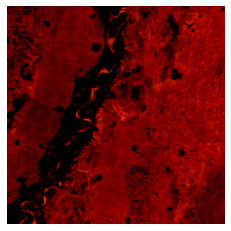

In [128]:
from torchvision import models, transforms
from PIL import Image
image_arr = torch.from_numpy(np.load('drive/MyDrive/bmi/west_africa/TD201400000452.npy'))
image = Image.fromarray(np.uint8(image_arr))
encodings = feature_extractor(images=image, return_tensors="pt")
pixel_values = encodings["pixel_values"]
arr_ = np.squeeze(pixel_values) # you can give axis attribute if you wanna squeeze in specific dimension
plt.imshow(arr_.T)
plt.axis('off')
plt.show()
#tensor_to_image(pixel_values)

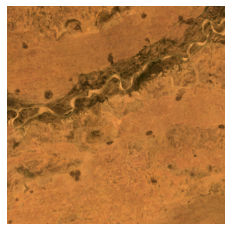

In [127]:
image_arr = torch.from_numpy(np.load('drive/MyDrive/bmi/west_africa/TD201400000452.npy'))
image = Image.fromarray(np.uint8(image_arr))
plt.axis('off')
plt.imshow(image)

In [145]:
import torch 
import torch.nn as nn 
import torch.nn.functional as F

from torch.nn import BCEWithLogitsLoss, CrossEntropyLoss, MSELoss

from transformers import ViTForImageClassification, ViTModel, ViTConfig

In [146]:
class ViTMosaiksModel(nn.Module):

	def __init__(self, n_classes, mosaiks_dim = 64, mlp_dim = 128):
		
		super().__init__()

		self.n_classes = n_classes
		# applies pooling layer 
		configuration = ViTConfig()
		self.model = ViTModel(configuration).from_pretrained('google/vit-base-patch16-224-in21k')
		
		hidden_dim = 768
		self.mlp = nn.Sequential(
            nn.Linear(hidden_dim + mosaiks_dim, mlp_dim),
            nn.ReLU(),
            nn.Linear(mlp_dim, mlp_dim),
            nn.ReLU(),            
            nn.Linear(mlp_dim, self.n_classes)
        )
	
	def forward(self, X, mosaiks_features):
		device = 'cuda' if torch.cuda.is_available() else 'cpu'
		model_out = self.model(X)['pooler_output']
		mosaiks_features = mosaiks_features.to(device)
		concat_output = torch.cat((model_out, mosaiks_features), dim=1)
		logits = self.mlp(concat_output)

		return logits

In [155]:
import torch.optim as optim

In [153]:
models = ViTMosaiksModel(n_classes=5)
checkpoint = torch.load('/content/drive/MyDrive/bmi/ViT_mosiaks_model.pkl/pytorch_model.bin', map_location=device)

In [156]:
optimizers = optim.SGD(models.parameters(), lr=0.001, momentum=0.9)
torch.save(models.state_dict(), 'model_weights.pth')
models.load_state_dict(torch.load('model_weights.pth'))

<All keys matched successfully>

In [130]:
model = models.densenet121(pretrained=True)
model.classifier = nn.Linear(model.classifier.in_features, 3) 

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
